In [2]:
import os
import re
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import h5py

from wombat.utils import listfiles

In [3]:
fp = '../analysis/sc_pdac/HT242P1-H1/output.h5'
f = h5py.File(fp, 'r')

In [4]:
f.keys()

<KeysViewHDF5 ['hyperparameters', 'latent_states', 'parameters', 'progress']>

In [5]:
iteration = list(f['parameters']['M'].keys())[-1]
f['parameters']['M'][iteration]

<HDF5 dataset "90": shape (12518, 20), type "<f8">

In [6]:
metagenes = np.asarray(f['parameters']['M'][iteration])
fov_to_emb = {}
for k in f['latent_states']['XT'].keys():
    fov_to_emb[k] = np.asarray(f['latent_states']['XT'][k][iteration])

In [7]:
gene_table = pd.read_csv('../analysis/sc_pdac/HT242P1-H1/inputs/files/genes_0.txt',
                         sep='\t', header=None, index_col=0)
gene_table.index.name = 'gene'
metagene_df = pd.DataFrame(data=metagenes, index=gene_table.index,
                         columns=[f'metagene_{i}'for i in range(metagenes.shape[1])])
metagene_df

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
LINC01128,1.493716e-04,1.051768e-05,1.870226e-05,1.819816e-05,2.390285e-15,5.223298e-15,1.312396e-05,1.947016e-05,9.489370e-06,1.364082e-14,1.902754e-05,5.919012e-05,6.389178e-15,5.778213e-06,9.315645e-06,0.000014,4.107493e-14,9.482704e-15,3.737233e-05,2.539382e-15
SAMD11,3.956250e-04,3.365765e-16,1.800956e-05,4.891704e-07,1.721335e-15,1.290421e-15,3.411394e-15,1.059398e-15,5.451815e-05,2.311426e-15,1.707954e-15,5.907456e-06,2.125455e-04,9.665027e-05,7.528787e-15,0.000028,2.800943e-04,4.432762e-16,7.661511e-16,5.282815e-16
NOC2L,1.330018e-04,8.356632e-05,7.988607e-05,9.855607e-05,2.988317e-05,2.234034e-05,9.257382e-05,1.915460e-04,2.667760e-04,9.440087e-05,8.062456e-05,8.376077e-05,7.531514e-05,5.080251e-05,5.954202e-05,0.000068,3.610164e-05,1.888189e-15,4.826253e-05,7.378645e-06
KLHL17,6.619750e-05,1.992762e-05,1.033970e-05,4.014451e-15,1.297202e-15,4.140902e-14,9.838506e-06,7.438737e-05,1.014449e-04,6.071900e-15,1.179503e-04,2.956502e-05,3.331962e-05,4.394456e-05,2.379103e-07,0.000002,9.765308e-06,4.629202e-15,1.926150e-15,4.042892e-15
PLEKHN1,7.123215e-07,3.565580e-05,3.752488e-15,4.502876e-15,3.007066e-15,1.885670e-14,9.913918e-16,5.729436e-05,4.357214e-05,2.433326e-05,8.864187e-05,4.586432e-15,8.587116e-05,4.165042e-15,3.289061e-05,0.000041,7.683649e-15,3.373221e-15,2.065027e-05,1.951181e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,7.117896e-05,4.354849e-05,2.870474e-05,2.389344e-15,3.084975e-04,2.078510e-15,1.644042e-04,2.664059e-05,1.214721e-16,8.580539e-16,2.669732e-16,1.153868e-04,1.699124e-04,6.249330e-16,1.909050e-05,0.000281,4.156634e-15,2.435343e-04,6.801855e-06,3.844813e-04
MT-ND4,3.403410e-04,1.485772e-04,4.076579e-04,7.526746e-14,1.435418e-03,1.811277e-03,5.450628e-04,2.115821e-04,1.850558e-15,1.864705e-15,1.295210e-15,6.867112e-04,4.191577e-04,8.449115e-05,8.865058e-05,0.000420,5.550262e-04,2.159902e-04,2.873019e-04,1.200113e-03
MT-ND5,1.698024e-04,1.029633e-04,1.199610e-04,1.220834e-15,7.364468e-04,4.044323e-04,3.234559e-04,4.179087e-05,8.506149e-17,7.761207e-16,1.986468e-16,2.453634e-04,4.196693e-04,1.047301e-15,5.961239e-05,0.000487,2.583300e-15,2.000220e-04,8.334614e-06,8.137058e-04


In [8]:
fps = sorted(listfiles('../analysis/sc_pdac/HT242P1-H1/inputs/input_adatas/'))
fps

['../analysis/sc_pdac/HT242P1-H1/inputs/input_adatas/PDAC_242P1-H1.h5ad',
 '../analysis/sc_pdac/HT242P1-H1/inputs/input_adatas/PDAC_242P1-H2A2.h5ad',
 '../analysis/sc_pdac/HT242P1-H1/inputs/input_adatas/PDAC_242P1-H3.h5ad',
 '../analysis/sc_pdac/HT242P1-H1/inputs/input_adatas/PDAC_242P1-H4A2.h5ad']

In [9]:
sample_to_adata = {fp.split('/')[-1].split('.')[0]:sc.read_h5ad(fp)
                   for fp in fps}
sample_to_adata.keys()

dict_keys(['PDAC_242P1-H1', 'PDAC_242P1-H2A2', 'PDAC_242P1-H3', 'PDAC_242P1-H4A2'])

In [10]:
directory = '../analysis/sc_pdac/HT242P1-H1/result_adatas'
Path(directory).mkdir(parents=True, exist_ok=True)
for s, a in sample_to_adata.items():
    fov = str(a.obs['fov'][0])
    a.obsm['metagene_emb'] = fov_to_emb[fov]
    a.uns['metagene_df'] = metagene_df
    
    a.write_h5ad(os.path.join(directory, f'{s}.h5ad'))
    

In [11]:
a = next(iter(sample_to_adata.values()))
a

AnnData object with n_obs × n_vars = 3073 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'sample_id', 'fov', 'n_counts', 'highlight'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'highlight_colors', 'spatial', 'spot_to_neighbors', 'metagene_df'
    obsm: 'spatial', 'metagene_emb'

In [13]:
a.obsm['metagene_emb'].shape

(3073, 20)

In [12]:
for i in range(a.obsm['metagene_emb'].shape[1]):
    a.obs[f'metagene_{i}'] = a.obsm['metagene_emb'][:, i]

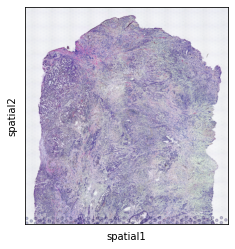

In [13]:
sc.pl.spatial(a)

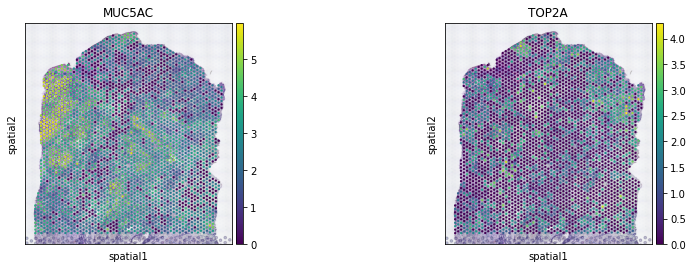

In [14]:
sc.pl.spatial(a, color=['MUC5AC', 'TOP2A'])

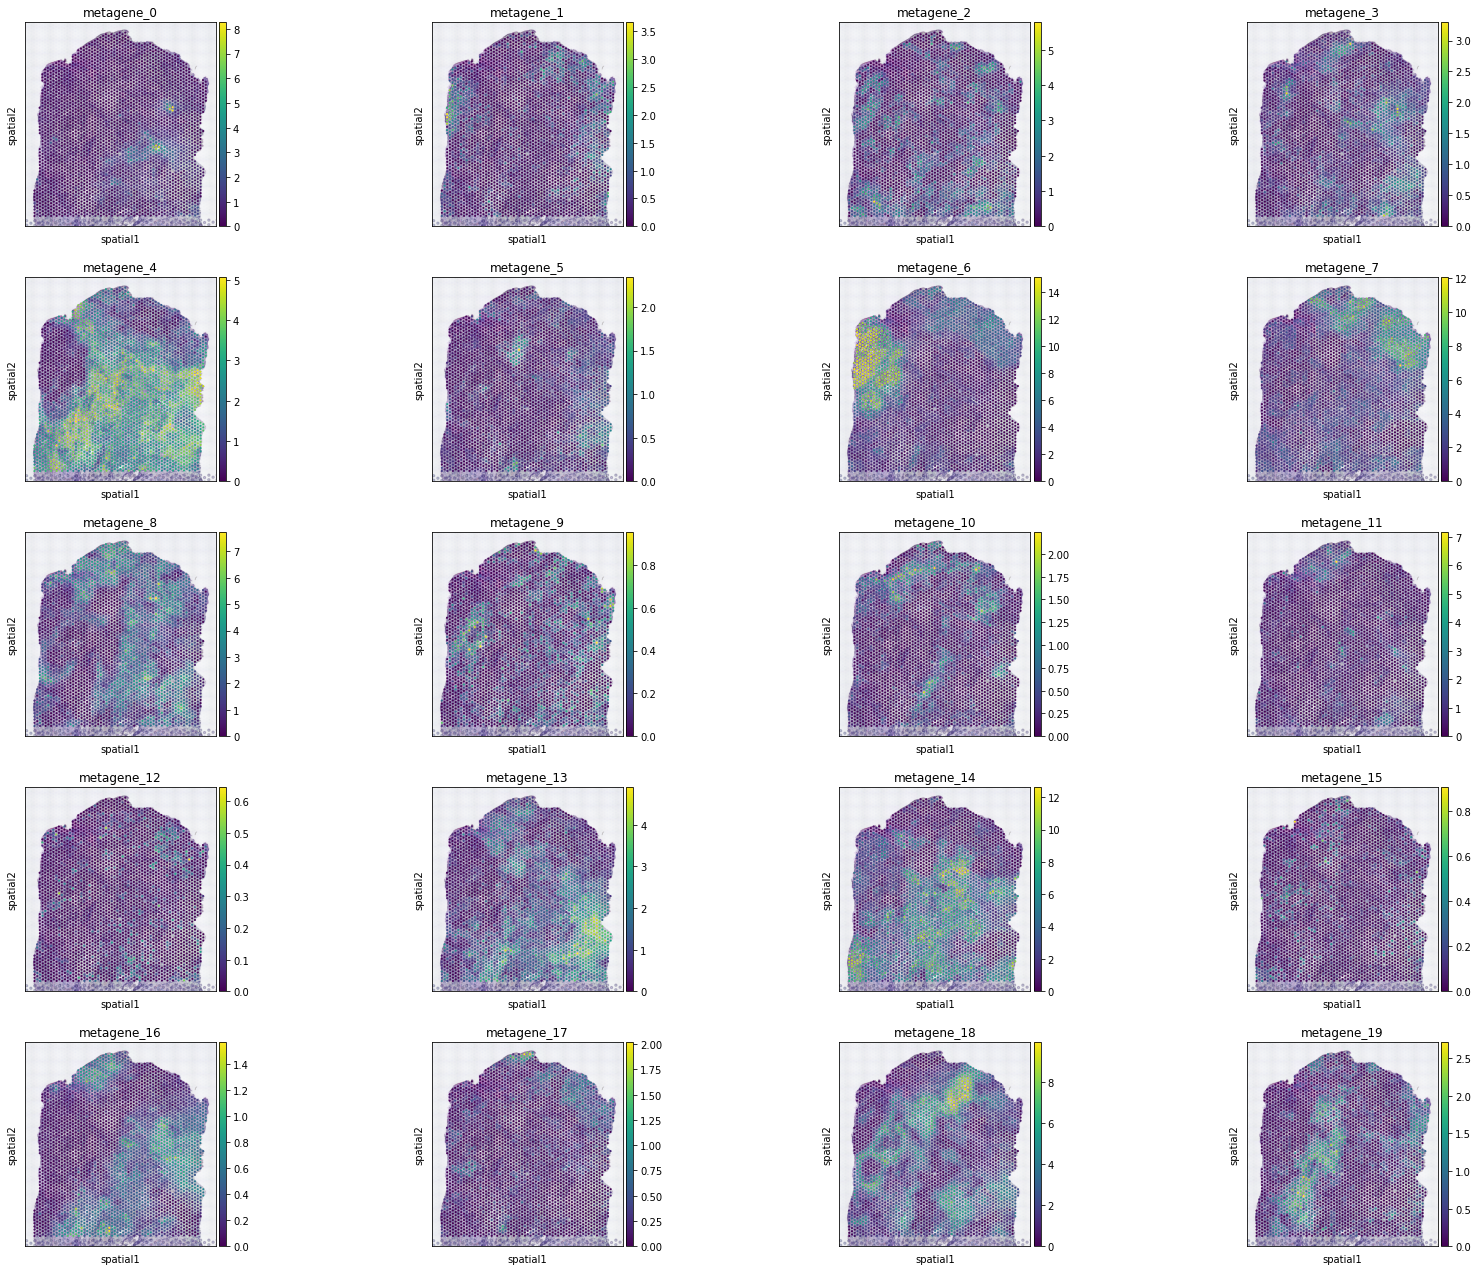

In [15]:
sc.pl.spatial(a, color=[c for c in a.obs.columns if 'metagene' in c])

In [16]:
metagene_df.sort_values('metagene_6', ascending=False)

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
REG4,3.144510e-15,1.446473e-16,3.257022e-05,1.026738e-04,4.649524e-04,2.711687e-04,8.785341e-04,2.204726e-05,2.077733e-16,5.155000e-05,9.212135e-16,3.251076e-15,1.961557e-16,1.938836e-15,1.757279e-16,2.941354e-16,8.631893e-15,1.294193e-03,5.870521e-16,9.592916e-05
LGALS4,8.096291e-16,1.126340e-16,5.298632e-05,3.121504e-04,1.243815e-03,4.101869e-16,7.753661e-04,4.289472e-04,1.110337e-04,4.619360e-16,1.187294e-15,6.852430e-05,5.933187e-05,1.162785e-15,8.641246e-16,2.473178e-16,4.019355e-04,6.830375e-04,2.621046e-04,3.649738e-06
S100A6,3.532824e-04,1.925271e-04,4.888883e-04,1.037465e-04,1.584516e-03,2.597036e-03,7.573524e-04,2.984970e-04,7.444232e-04,9.301589e-05,6.547430e-04,5.727919e-04,6.932208e-04,2.257109e-04,2.394728e-04,1.007796e-04,7.925504e-04,3.906499e-04,6.078531e-04,1.302738e-03
RPL17,3.401982e-04,1.181227e-04,4.545362e-04,8.771686e-05,1.832950e-03,1.824190e-03,7.490968e-04,2.526049e-04,3.753802e-04,6.701904e-15,5.850238e-04,5.159511e-04,4.856134e-04,1.531127e-04,3.035095e-04,1.662905e-04,8.071468e-04,2.068085e-15,9.122724e-04,9.780939e-04
S100A10,3.010868e-04,1.624323e-04,5.141400e-04,4.140491e-05,1.304979e-03,2.188246e-03,6.778763e-04,2.789051e-04,4.449429e-04,8.804345e-05,6.379540e-04,3.121955e-04,6.172568e-04,1.650298e-04,2.534331e-04,2.985786e-04,3.253427e-04,3.811130e-04,6.179797e-04,1.288218e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCCRP1,2.170792e-15,2.810196e-16,2.786722e-16,1.457740e-15,2.720680e-04,8.737438e-16,1.190707e-16,1.997624e-05,1.446039e-05,5.783924e-15,1.363794e-14,7.542529e-16,9.979194e-16,4.235481e-05,3.040270e-04,1.191310e-15,2.990320e-15,7.205883e-16,2.254491e-05,8.955205e-16
SPINK6,1.517889e-15,8.705716e-05,1.988628e-04,1.080627e-15,1.891204e-16,1.195855e-15,1.146339e-16,1.770071e-16,3.111090e-16,6.511732e-04,1.540547e-04,5.322987e-16,2.367654e-15,4.362819e-16,1.149384e-16,4.741705e-16,8.973099e-16,6.656847e-15,2.187226e-16,6.500339e-05
SUCNR1,7.658802e-05,2.372064e-04,2.007670e-04,9.383226e-15,1.697644e-16,5.827980e-04,9.765453e-17,9.681115e-17,1.120826e-15,7.809869e-04,7.315824e-05,3.892298e-05,1.048785e-03,3.814772e-16,1.475039e-16,8.176043e-04,4.023156e-15,2.198216e-15,1.350558e-16,5.757255e-04


In [17]:
metagene_df.sort_values('metagene_7', ascending=False)

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
UBE2C,5.347213e-05,2.048134e-16,1.879784e-04,6.455795e-05,5.036241e-05,2.946056e-05,1.182686e-04,5.738491e-04,9.290591e-16,3.488877e-04,5.266614e-16,6.572769e-15,0.000096,4.053022e-05,3.537119e-16,1.109535e-04,1.632988e-05,5.941735e-16,4.288710e-16,5.784019e-05
DKK1,9.025732e-05,1.486097e-04,1.841917e-04,5.811929e-05,2.372637e-04,5.767551e-04,6.497660e-05,5.577642e-04,1.032553e-15,7.950297e-04,2.732626e-04,1.953362e-15,0.000896,9.051741e-16,1.882648e-04,1.799380e-04,1.063030e-04,1.034198e-03,2.212220e-04,5.803018e-04
GPRC5A,5.080370e-05,1.718839e-04,3.098114e-05,4.063632e-14,9.439358e-04,3.280351e-04,3.378806e-04,4.597039e-04,1.899180e-04,2.608252e-04,1.145549e-04,1.727628e-15,0.000067,6.999273e-05,1.999410e-04,4.249349e-04,1.021843e-04,8.845246e-04,3.348817e-04,1.280527e-04
TOP2A,8.552010e-15,3.600631e-16,1.562214e-04,5.140922e-06,7.013586e-05,2.028101e-06,1.073225e-04,4.403758e-04,1.874841e-16,1.877034e-04,5.335527e-16,4.756514e-06,0.000080,3.207676e-15,8.578190e-16,2.519980e-04,6.474395e-15,4.982979e-16,2.316435e-16,1.067597e-04
LGALS4,8.096291e-16,1.126340e-16,5.298632e-05,3.121504e-04,1.243815e-03,4.101869e-16,7.753661e-04,4.289472e-04,1.110337e-04,4.619360e-16,1.187294e-15,6.852430e-05,0.000059,1.162785e-15,8.641246e-16,2.473178e-16,4.019355e-04,6.830375e-04,2.621046e-04,3.649738e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRRC17,4.691828e-15,2.993633e-04,1.998008e-04,1.334220e-15,1.982766e-16,1.668347e-04,9.173682e-17,1.439137e-16,5.610643e-16,6.889488e-04,2.550832e-04,1.506001e-15,0.000312,2.766028e-05,1.178156e-16,3.839565e-04,1.152345e-14,6.623744e-06,2.118674e-16,4.533815e-04
CHRDL1,4.272196e-06,2.097751e-04,1.844109e-04,2.417357e-15,1.674255e-16,1.958114e-04,1.367550e-16,1.385575e-16,9.897292e-16,4.915685e-04,3.380835e-04,1.611190e-15,0.000362,5.006837e-16,1.226769e-16,1.698340e-04,1.598663e-15,2.391264e-04,1.624177e-16,3.225123e-04
SUCNR1,7.658802e-05,2.372064e-04,2.007670e-04,9.383226e-15,1.697644e-16,5.827980e-04,9.765453e-17,9.681115e-17,1.120826e-15,7.809869e-04,7.315824e-05,3.892298e-05,0.001049,3.814772e-16,1.475039e-16,8.176043e-04,4.023156e-15,2.198216e-15,1.350558e-16,5.757255e-04


In [18]:
metagene_df.sort_values('metagene_18', ascending=False)

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
RPL17,0.000340,1.181227e-04,4.545362e-04,8.771686e-05,1.832950e-03,1.824190e-03,7.490968e-04,2.526049e-04,3.753802e-04,6.701904e-15,5.850238e-04,0.000516,4.856134e-04,1.531127e-04,3.035095e-04,1.662905e-04,8.071468e-04,2.068085e-15,9.122724e-04,9.780939e-04
GAPDH,0.000360,2.009433e-04,4.831628e-04,6.760827e-15,1.251855e-03,2.338817e-03,4.520594e-04,3.586077e-04,6.842760e-04,1.706424e-04,6.057205e-04,0.000530,7.143428e-04,1.748197e-04,1.161329e-04,8.344308e-05,4.044485e-04,1.094672e-04,8.792629e-04,1.199176e-03
TPT1,0.000313,2.152313e-04,4.778856e-04,5.435467e-05,1.207992e-03,2.099959e-03,5.328579e-04,1.625799e-04,3.203814e-04,1.546641e-15,5.141943e-04,0.000612,6.126995e-04,1.429690e-04,2.429253e-04,1.802920e-04,7.345673e-04,1.458650e-04,8.733417e-04,1.223840e-03
FTH1,0.000343,1.734781e-04,4.551467e-04,3.138318e-04,1.298464e-03,2.192802e-03,6.308199e-04,1.654672e-04,5.180495e-04,2.157857e-15,6.862583e-04,0.000613,6.602544e-04,1.827601e-04,2.452468e-04,1.853395e-05,4.696984e-04,2.406256e-04,8.445949e-04,1.207231e-03
RPS16,0.000325,2.011429e-04,5.986025e-04,4.005265e-15,1.464258e-03,2.568158e-03,6.659476e-04,2.990287e-04,5.851946e-04,4.163719e-15,5.535186e-04,0.000488,6.999599e-04,1.654552e-04,2.302788e-04,1.919863e-04,5.819099e-04,1.482811e-05,8.260053e-04,1.333220e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGP,0.000275,2.862389e-16,1.683722e-04,3.135148e-04,3.080415e-04,2.455907e-04,6.769572e-05,1.727007e-04,1.476172e-04,5.773230e-04,2.749580e-04,0.001071,1.879457e-04,6.753616e-04,4.340942e-15,1.505043e-04,1.671520e-03,6.076419e-05,1.449996e-16,1.683364e-04
SUCNR1,0.000077,2.372064e-04,2.007670e-04,9.383226e-15,1.697644e-16,5.827980e-04,9.765453e-17,9.681115e-17,1.120826e-15,7.809869e-04,7.315824e-05,0.000039,1.048785e-03,3.814772e-16,1.475039e-16,8.176043e-04,4.023156e-15,2.198216e-15,1.350558e-16,5.757255e-04
RARRES1,0.000064,4.410271e-16,7.237597e-05,7.281443e-04,1.750140e-04,5.153115e-16,2.788275e-04,5.643438e-07,2.711947e-16,6.322264e-16,7.970647e-16,0.000058,1.249649e-04,6.848838e-05,2.631198e-04,4.621871e-16,2.167280e-04,3.243797e-04,1.298695e-16,3.028927e-05


In [19]:
metagene_df.sort_values('metagene_18', ascending=False).index[:20]

Index(['RPL17', 'GAPDH', 'TPT1', 'FTH1', 'RPS16', 'NDRG1', 'ADM', 'FTL',
       'TMSB10', 'ERO1A', 'EEF1A1', 'MALAT1', 'RPS27', 'RPLP1', 'SPP1',
       'RPL30', 'RPL32', 'RPL10', 'RPS18', 'RPL28'],
      dtype='object', name='gene')

In [1]:
a.obsm.keys()

NameError: name 'a' is not defined